In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# Подобрать 2 изображения для коррекции

In [6]:
image1_path = "/Users/dimka777/Documents/Магистратура/Mag_2_semester/ImageProcessing/PW_2/images/image_1.jpg"
image2_path = "/Users/dimka777/Documents/Магистратура/Mag_2_semester/ImageProcessing/PW_2/images/image_2.jpeg"

In [7]:
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


images = [image1, image2]

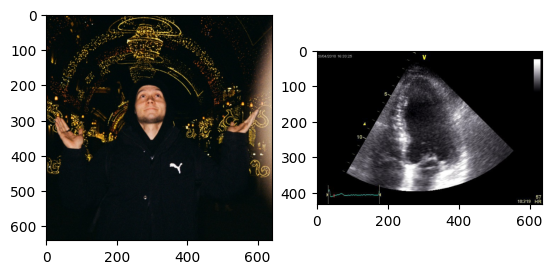

In [8]:
f  = plt.figure()
for i, image  in enumerate(images):
    f.add_subplot(1,2, i+1)
    plt.imshow(image)
plt.show()

# Перевести изображения в черно-белое

In [9]:
# Перевод в LAB 
images_LAB = [cv2.cvtColor(image, cv2.COLOR_RGB2LAB) for image in images]

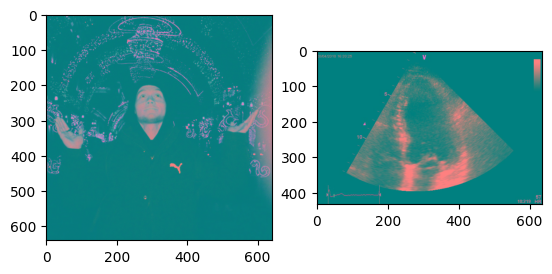

In [10]:
f  = plt.figure()
for i, image  in enumerate(images_LAB):
    f.add_subplot(1,2, i+1)
    plt.imshow(image)
plt.show()

In [11]:
img = images_LAB[0]

In [12]:
img[...,2].shape
print(img[...,0])

[[5 6 3 ... 9 9 8]
 [7 5 9 ... 7 7 5]
 [9 6 7 ... 9 9 7]
 ...
 [7 8 8 ... 7 8 8]
 [7 8 8 ... 6 8 8]
 [7 7 7 ... 6 8 8]]


In [13]:
# только канал L 
images_LAB = [image[...,0] for image in images_LAB]

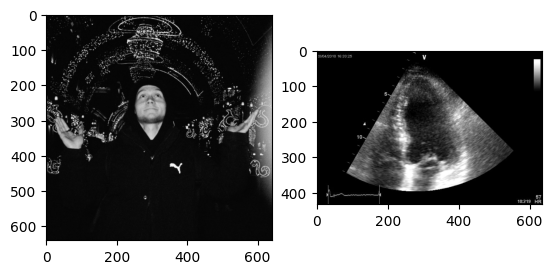

In [14]:
f  = plt.figure()
for i, image  in enumerate(images_LAB):
    f.add_subplot(1,2, i+1)
    plt.imshow(image, cmap='gray')
plt.show()

# Преобразовать изображения в негатив

In [15]:
def get_negative(image):
    return np.array(255-image)

In [16]:
images_negative = [get_negative(image_L) for image_L in images_LAB]

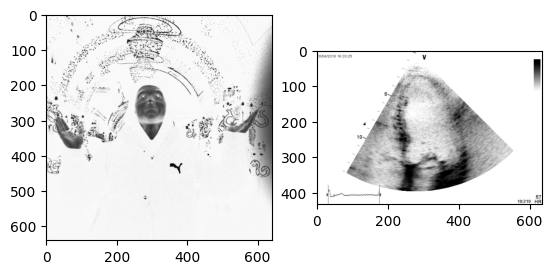

In [17]:
f  = plt.figure()
for i, image  in enumerate(images_negative):
    f.add_subplot(1,2, i+1)
    plt.imshow(image, cmap='gray')
plt.show()

# Логарифмическое преобразование 

In [18]:
def get_log(r_, c):
    r = r_.copy()
    r[r==255]=254 # делаем такое преобразование, чтобы 0 не попал под логарифм
    s=np.asarray(c*np.log(1+r)/np.log(255),dtype=np.uint8)
    return s

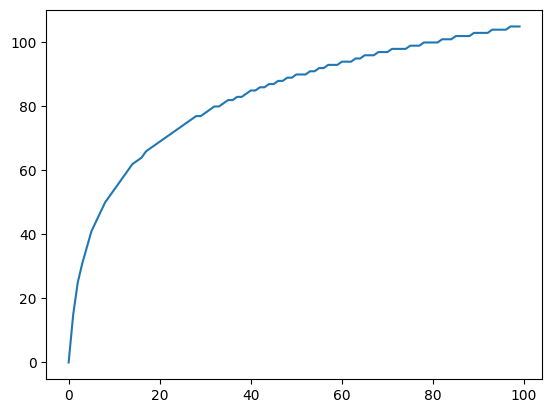

In [25]:
x = np.arange(0,100)
y = get_log(x, 127)
plt.plot(x,y)

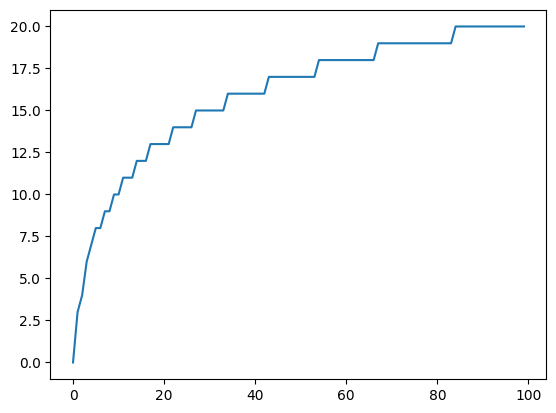

In [26]:
x = np.arange(0,100)
y = get_log(x, 25)
plt.plot(x,y)

In [19]:
images_log_127 = [get_log(image, 127) for image in images_LAB]
images_log_25 = [get_log(image, 25) for image in images_LAB]

In [20]:
images_LAB[0]

array([[5, 6, 3, ..., 9, 9, 8],
       [7, 5, 9, ..., 7, 7, 5],
       [9, 6, 7, ..., 9, 9, 7],
       ...,
       [7, 8, 8, ..., 7, 8, 8],
       [7, 8, 8, ..., 6, 8, 8],
       [7, 7, 7, ..., 6, 8, 8]], dtype=uint8)

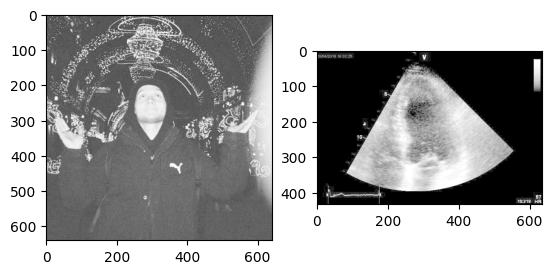

In [21]:
f  = plt.figure()
for i, image  in enumerate(images_log_127):
    f.add_subplot(1,2, i+1)
    plt.imshow(image, cmap='gray')
plt.show()

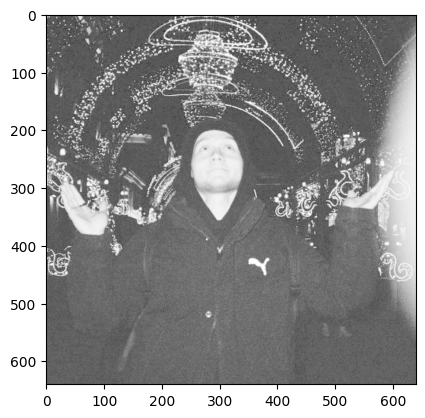

In [ ]:
plt.imshow(images_log_25[0], cmap='gray')

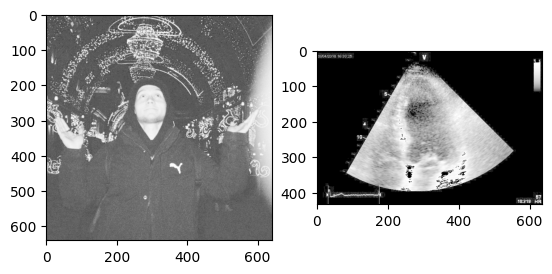

In [ ]:
f  = plt.figure()
for i, image  in enumerate(images_log_25):
    f.add_subplot(1,2, i+1)
    plt.imshow(image, cmap='gray')
plt.show()

# Cтепенное преобразование

In [28]:
def deg_gamma(img, gamma):
    return np.array(255*(img / 255) ** gamma, dtype = 'uint8')

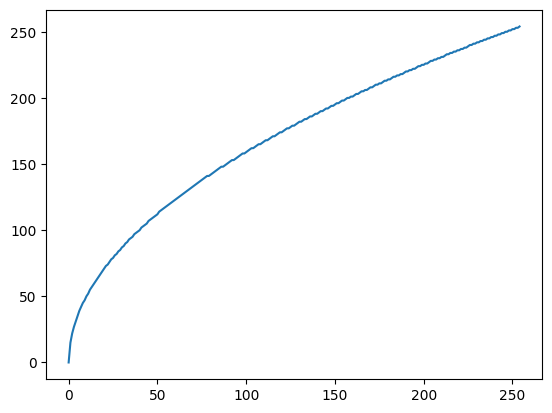

In [46]:
x = np.arange(0,255)
y = deg_gamma(x, 0.5)
plt.plot(x,y)

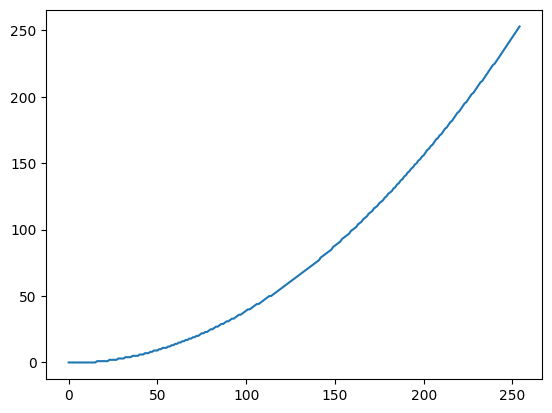

In [47]:
x = np.arange(0,255)
y = deg_gamma(x, 2)
plt.plot(x,y)

In [ ]:
images_gamma_05 = [deg_gamma(image, 0.5) for image in images_LAB]
images_gamma_2 = [deg_gamma(image, 2) for image in images_LAB]

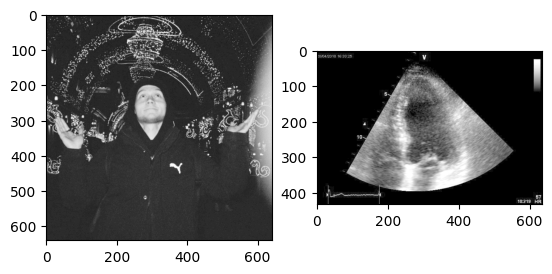

In [ ]:
f  = plt.figure()
for i, image  in enumerate(images_gamma_05):
    f.add_subplot(1,2, i+1)
    plt.imshow(image, cmap='gray')
plt.show()

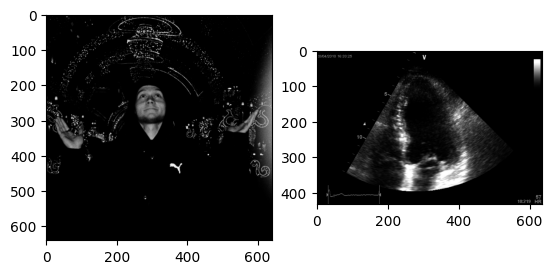

In [ ]:
f  = plt.figure()
for i, image  in enumerate(images_gamma_2):
    f.add_subplot(1,2, i+1)
    plt.imshow(image, cmap='gray')
plt.show()

# Кусочно-линейное преобразование

In [32]:
def pixel_val(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

In [33]:
r1 = 70
s1 = 0
r2 = 140
s2 = 255

In [34]:
pixelVal_vec = np.vectorize(pixel_val)

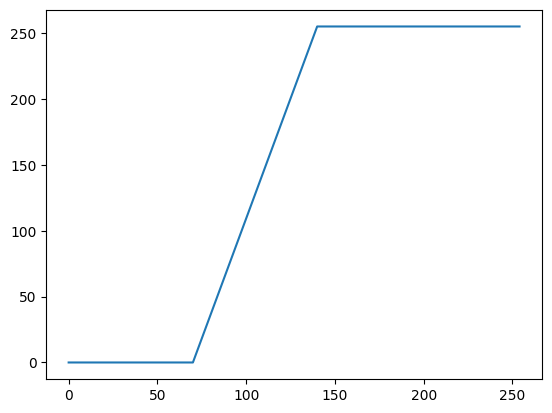

In [48]:
x = np.arange(0,255)
y = pixelVal_vec(x, r1, s1, r2, s2)
plt.plot(x,y)

In [ ]:
images_contrast = [pixelVal_vec(image, r1, s1, r2, s2) for image in images_LAB]

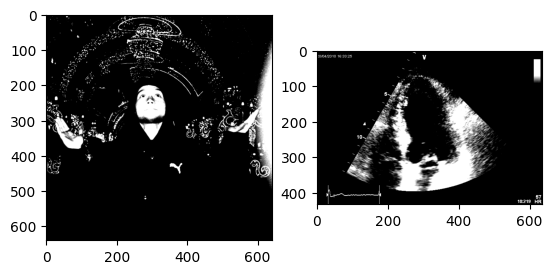

In [ ]:
f  = plt.figure()
for i, image  in enumerate(images_contrast):
    f.add_subplot(1,2, i+1)
    plt.imshow(image, cmap='gray')
plt.show()

# Вырезание уровней в изображении

In [43]:
def cut_lvl(pix, r_min, r_max):
    if (pix >=r_min and pix <= r_max):
        return 255
    else:
        return pix

In [44]:
cut_lvl_vec = np.vectorize(cut_lvl)

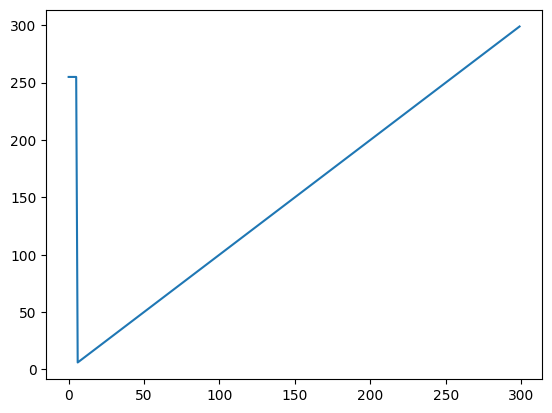

In [45]:
x = np.arange(0,300)
y = cut_lvl_vec(x, 0, 5)
plt.plot(x,y)

In [ ]:
images_cut_lvl = [cut_lvl_vec(image,0, 5) for image in images_LAB]

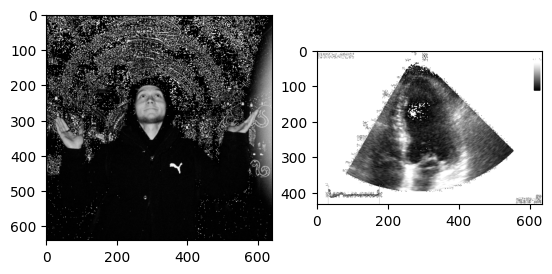

In [ ]:
f  = plt.figure()
for i, image  in enumerate(images_cut_lvl):
    f.add_subplot(1,2, i+1)
    plt.imshow(image, cmap='gray')
plt.show()